<a href="https://colab.research.google.com/github/krauseannelize/nb-py-ms-exercises/blob/sprint05/notebooks/s05_pandas_eda/48_complete_eda_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 48 | Complete EDA on Tips Dataset

Now that we have separately explored the different techniques and charts that are part of an exploratory data analysis at the univariate, bivariate, and multivariate levels, we will apply them to this tips dataset to see if we can find any relevant insights.

## Preparation

In [1]:
# Step 1: Import libraries
import seaborn as sns

# Step 2: List available datasets in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
# Step 3: Load the `tips` dataset from seaborn
df = sns.load_dataset('tips')

# Step 4: Preview data
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Step 5: Display information about the data
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
# Step 6: Check for duplicate values
print("Duplicate Values:")
df.duplicated().sum()

Duplicate Values:


np.int64(1)

In [5]:
# Step 7: Display basic statistics of data
print("Basic Statistics:")
df.describe()

Basic Statistics:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Visualizations

### Histogram | Distribution of Total Bill

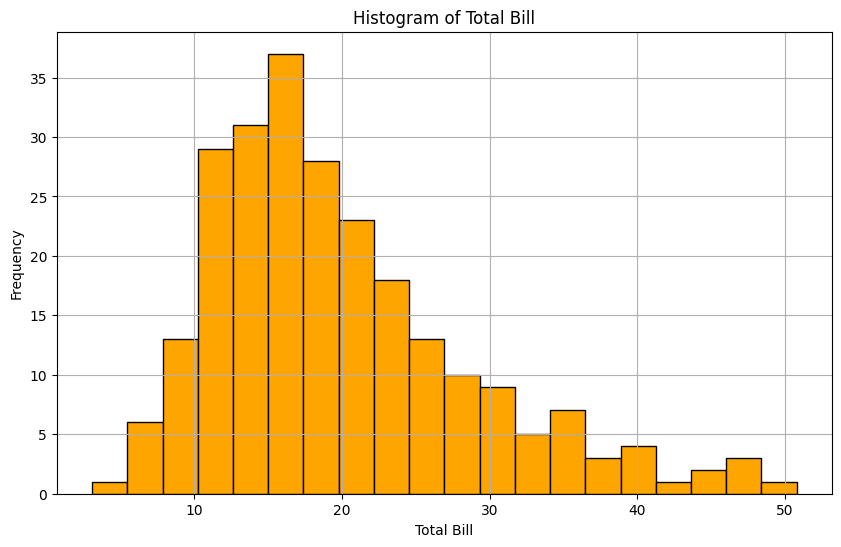

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["total_bill"], bins=20, color='orange', edgecolor='black')
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.title("Histogram of Total Bill")
plt.grid(True)
plt.show()

### Density Plot | Kernel Density Estimation for Total Bill

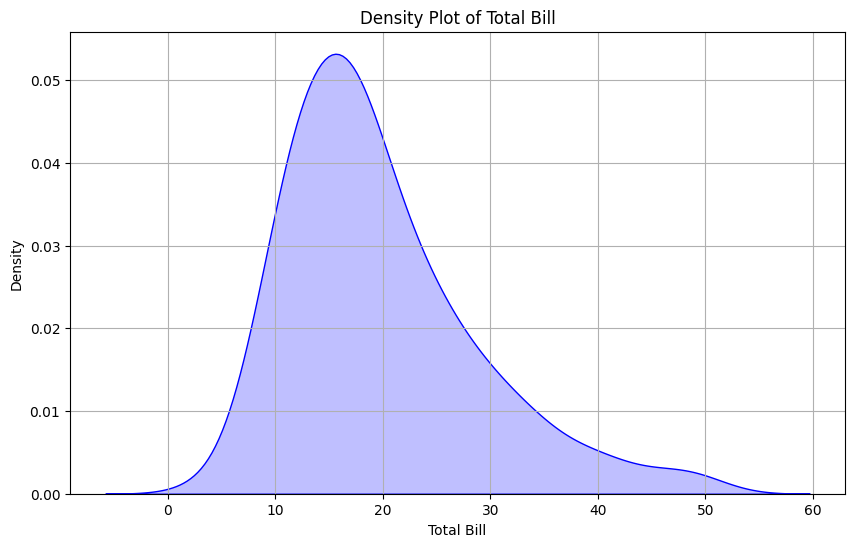

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['total_bill'], fill=True, color='blue')
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Density Plot of Total Bill")
plt.grid(True)
plt.show()

### Density Plot | Kernel Density Estimation for Tips

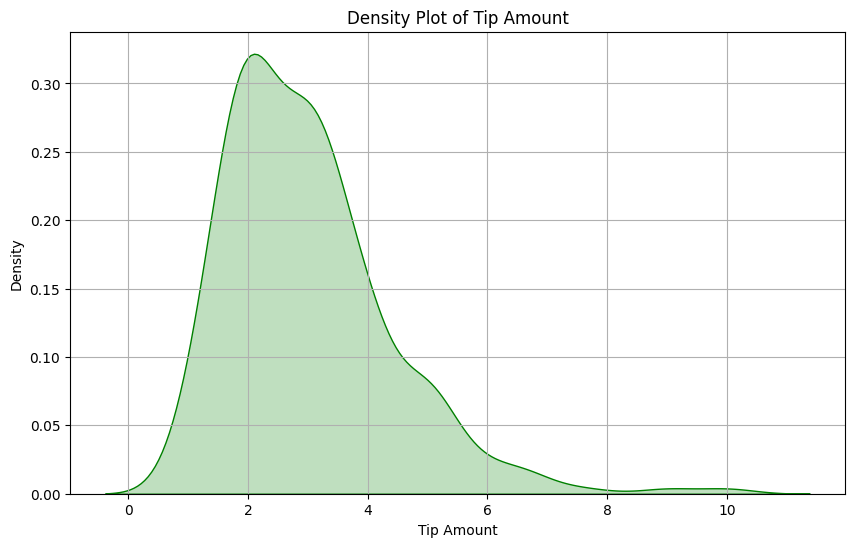

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['tip'], fill=True, color='green')
plt.xlabel("Tip Amount")
plt.ylabel("Density")
plt.title("Density Plot of Tip Amount")
plt.grid(True)
plt.show()

### Box Plot | Detect Outliers in `total_bill`

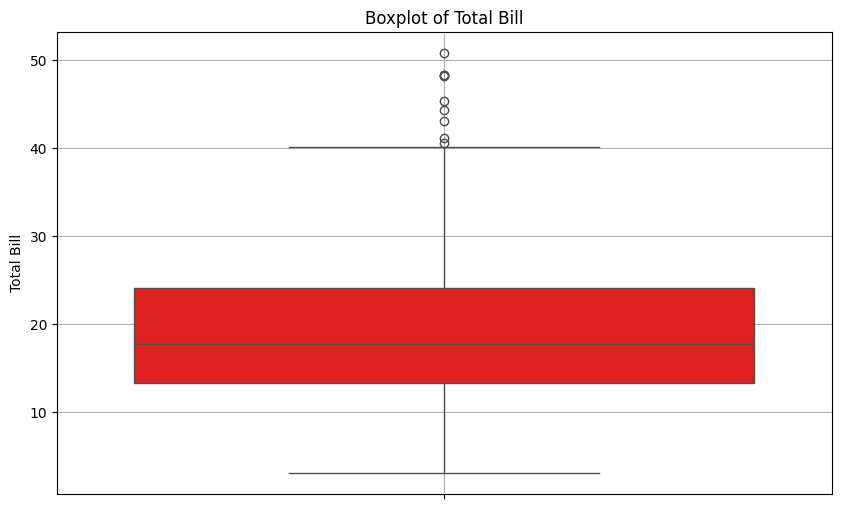

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["total_bill"], color="red")
plt.ylabel("Total Bill")
plt.title("Boxplot of Total Bill")
plt.grid(True)
plt.show()

### Violin Plot | Distribution of `tip`

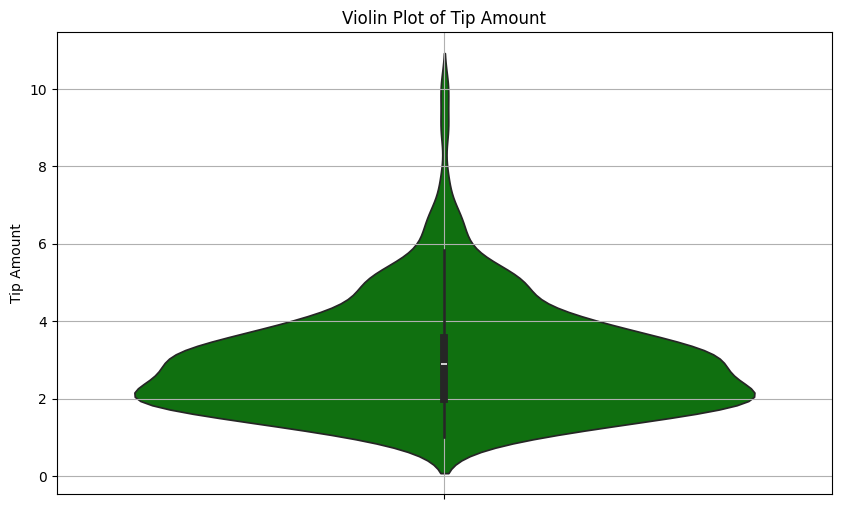

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=df["tip"], color="green")
plt.ylabel("Tip Amount")
plt.title("Violin Plot of Tip Amount")
plt.grid(True)
plt.show()

### Bar Plot | Count of `day`

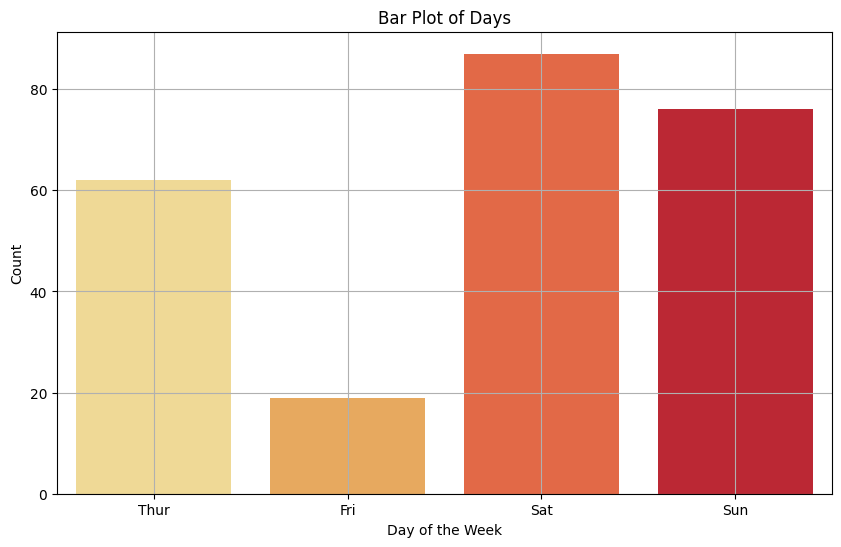

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["day"], hue=df["day"], palette="YlOrRd")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Bar Plot of Days")
plt.grid(True)
plt.show()

### Scatter Plot | Total Bill vs Tips

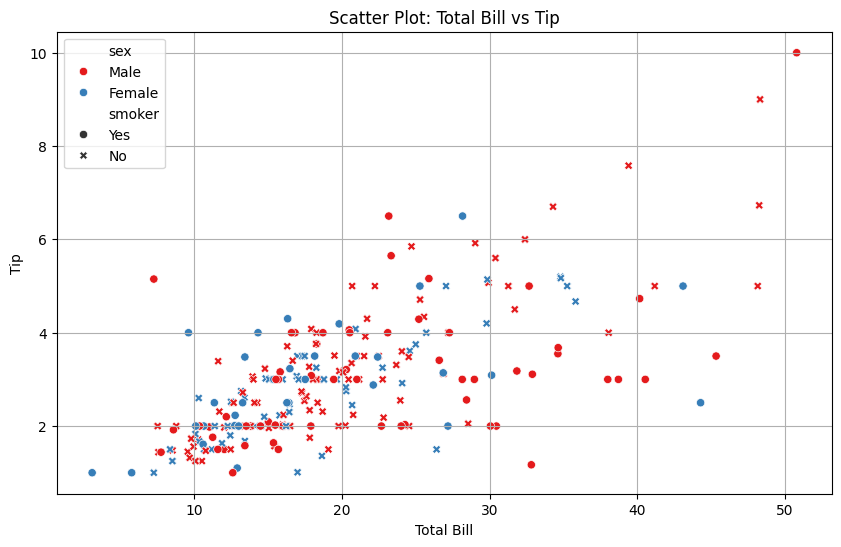

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["total_bill"],
    y=df["tip"],
    hue=df["sex"],
    style=df["smoker"],
    palette="Set1")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Scatter Plot: Total Bill vs Tip")
plt.grid(True)
plt.show()

## Pair Plot | Pairwise Relationships between Numerical Features

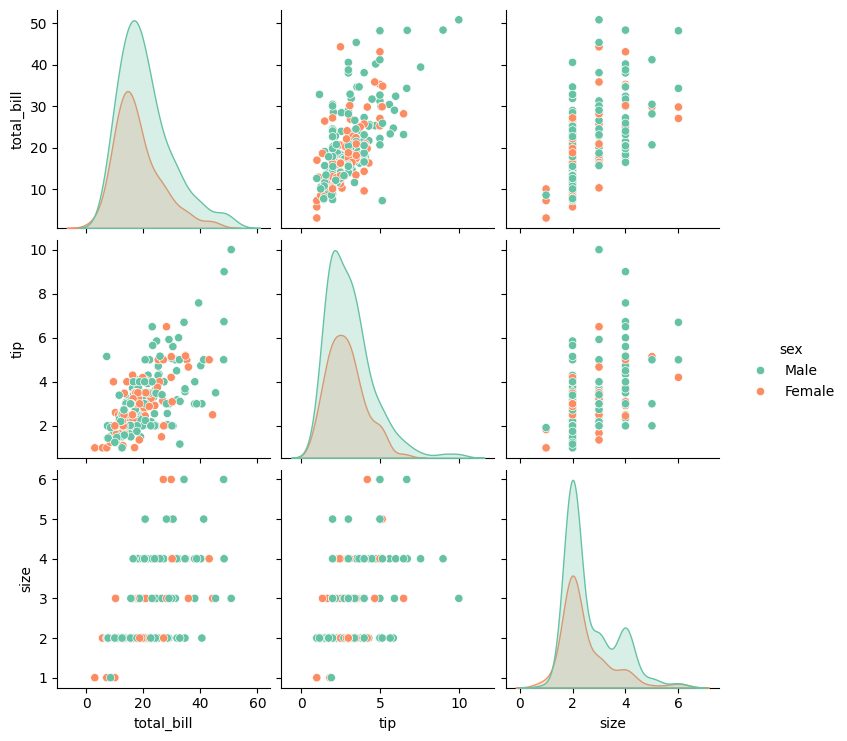

In [13]:
sns.pairplot(df, hue="sex", palette="Set2")
plt.show()

### Correlation Heatmap | Only Numerical Features

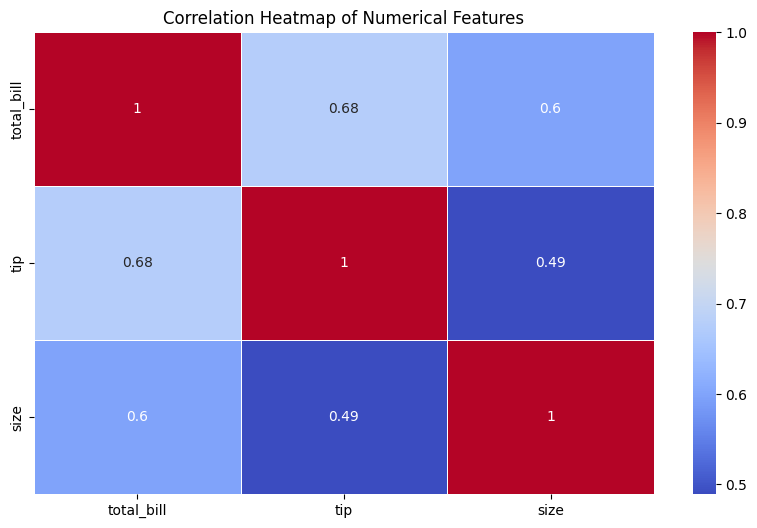

In [14]:
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation calculation
numeric_df = df.select_dtypes(include=["number"])

# Generate heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Box Plot | Day vs Total Bill

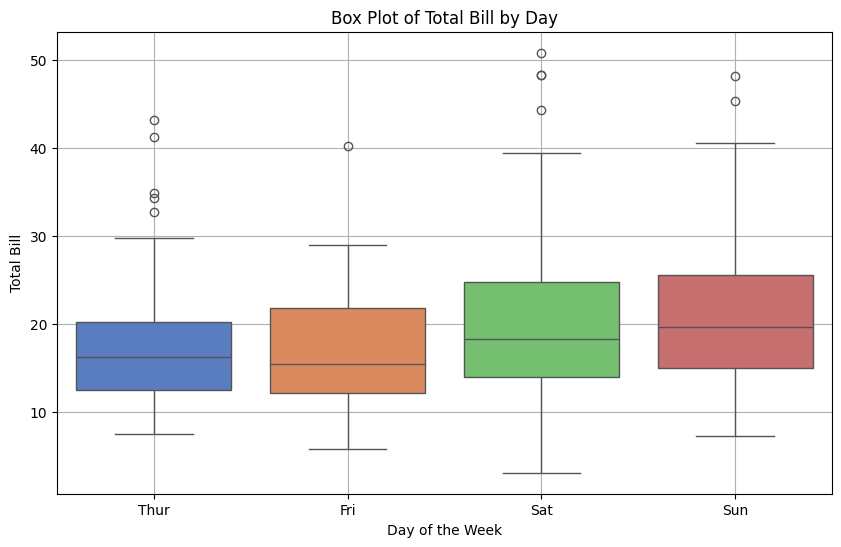

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["day"], y=df["total_bill"], hue=df["day"], palette="muted")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")
plt.title("Box Plot of Total Bill by Day")
plt.grid(True)
plt.show()

### Violin Plot | Time of Day vs Tip

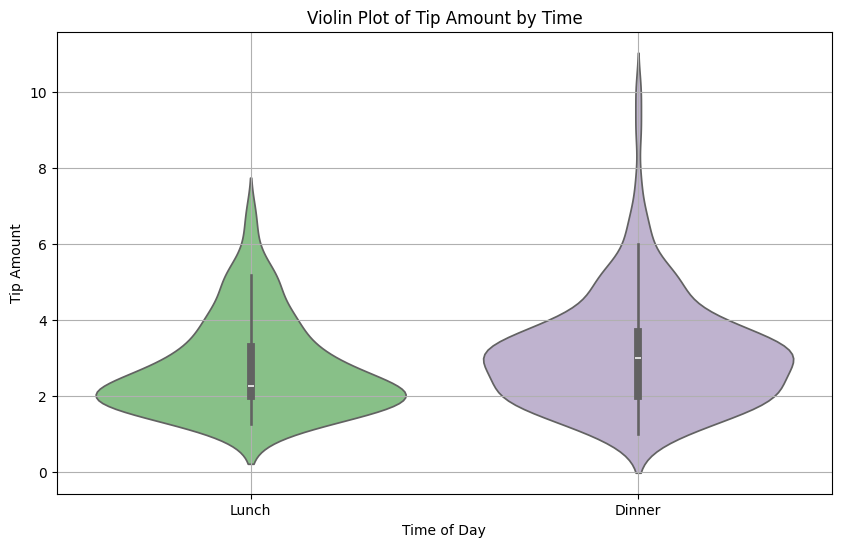

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["time"], y=df["tip"], hue=df["time"], palette="Accent")
plt.xlabel("Time of Day")
plt.ylabel("Tip Amount")
plt.title("Violin Plot of Tip Amount by Time")
plt.grid(True)
plt.show()

### Bar Plot | Gender vs Average Tip

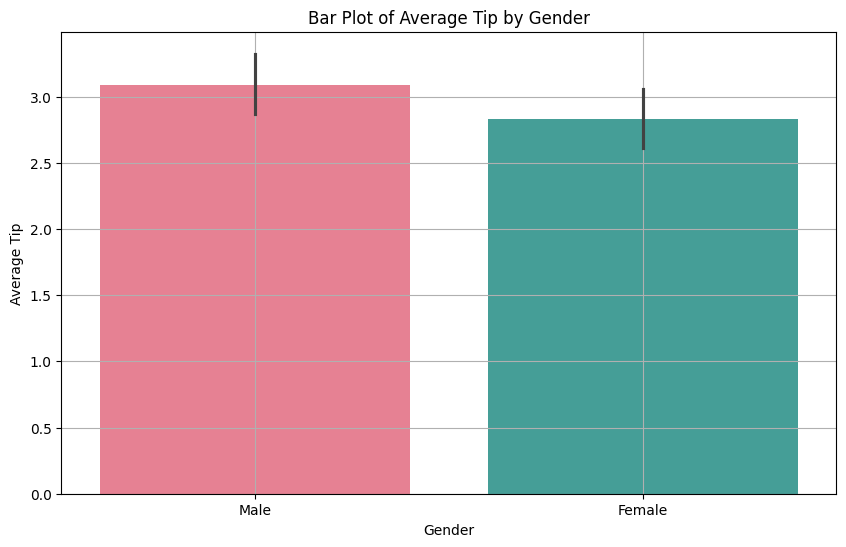

In [17]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.barplot(x=df["sex"], y=df["tip"], estimator=np.mean, hue=df["sex"], palette="husl")
plt.xlabel("Gender")
plt.ylabel("Average Tip")
plt.title("Bar Plot of Average Tip by Gender")
plt.grid(True)
plt.show()

### Multivariate Scatter Plot | Total Bill vs Tips vs Group Size

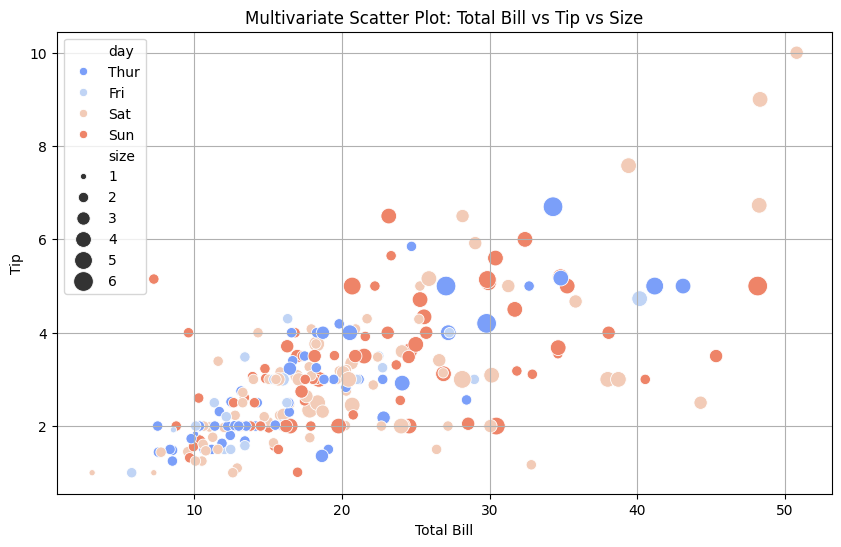

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["total_bill"], y=df["tip"], size=df["size"], hue=df["day"], palette="coolwarm", sizes=(20, 200))
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Multivariate Scatter Plot: Total Bill vs Tip vs Size")
plt.legend()
plt.grid(True)
plt.show()

### Multivariate Box Plot | Tips Across Gender & Smoking Status

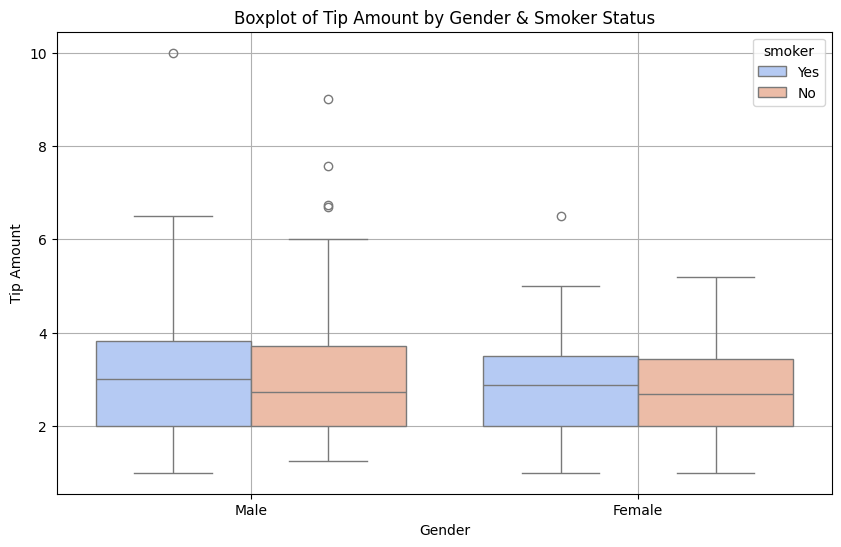

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="sex", y="tip", hue="smoker", palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.title("Boxplot of Tip Amount by Gender & Smoker Status")
plt.grid(True)
plt.show()

### Facet Grid | Total Bill Distribution Across Days & Times

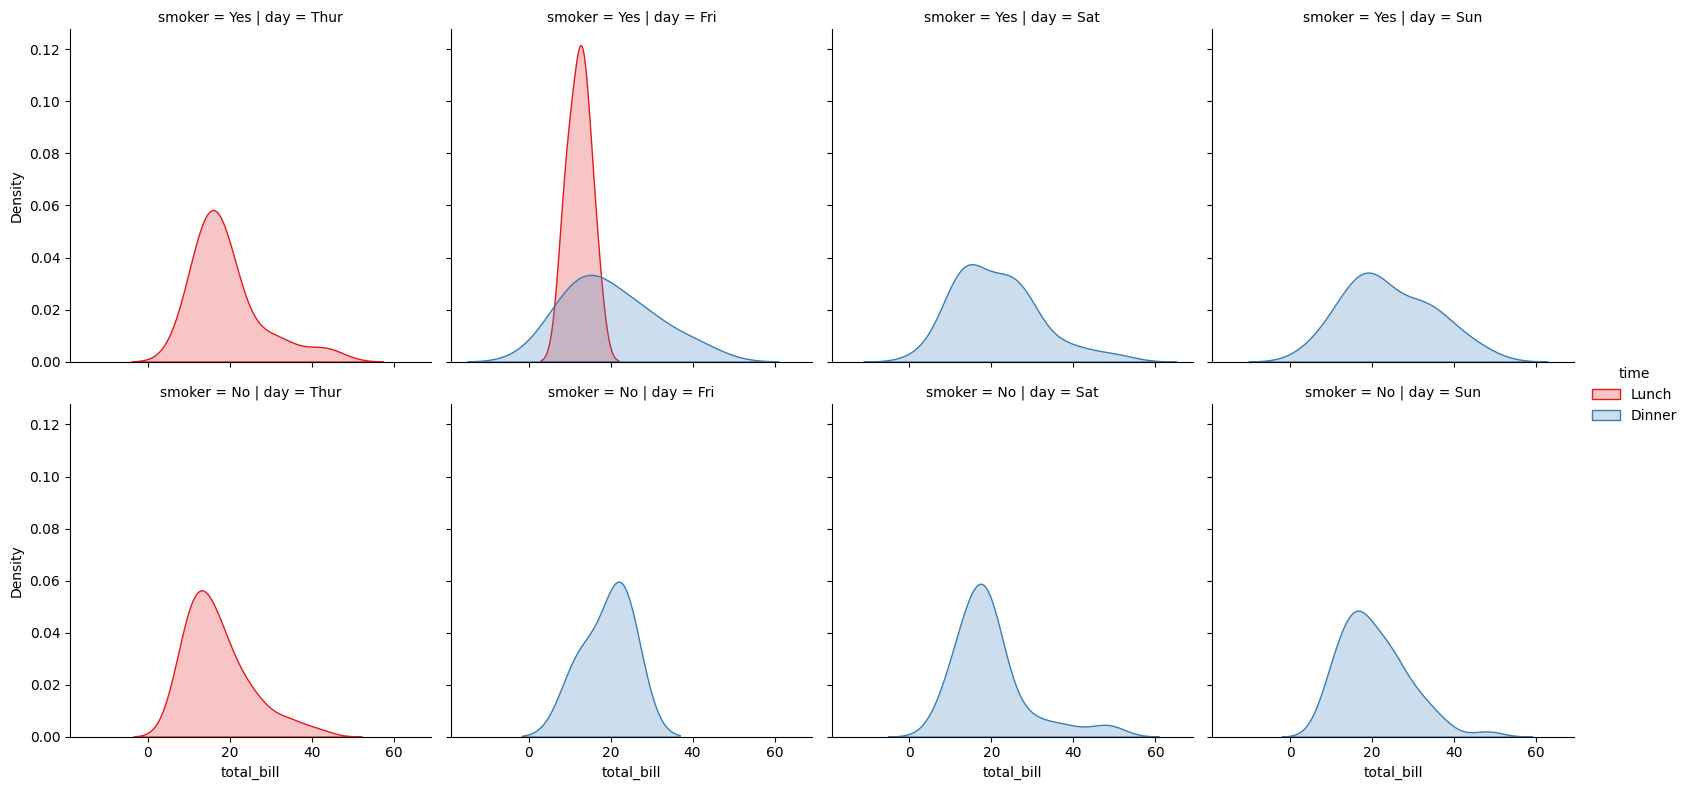

In [20]:
# add `warn_singular=False` to suppress warning that in some panels,
# the subset of data has no variation in `total_bill`
g = sns.FacetGrid(df, col="day", row= "smoker", hue="time", palette="Set1", height=4)
g.map_dataframe(sns.kdeplot, x="total_bill", fill=True, warn_singular=False)
g.add_legend()
plt.show()

## Generate an Automated EDA report using `ydata-profiling`

In [21]:
# Install ydata-profiling
!pip install ydata-profiling

In [23]:
# Import libraries
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns

# Load the `tips` dataset from seaborn
df = sns.load_dataset('tips')

# Create a profiling report from the DataFrame
profile = ProfileReport(df, title="EDA Report", explorative=True)

# Export the report to an HTML file
profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 96.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]